In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
sns.set_context('talk')
sns.set_style('ticks')
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

In [3]:
sim_name = 'test_schedule_v4'
outdir = f'fig/{sim_name}'
if not os.path.exists(outdir):
    os.mkdir(outdir)

In [5]:
%run ../bin/analyze_sim.py test_schedule_v4

/Users/ebellm/anaconda3/envs/ztf_sim/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Simulation Name	test_schedule_v4
Number of Nights	362
Nights completely weathered out	88
Average Hours of Darkness	9.940953265617141
Total Science Time (h)	2139.122197122104
Average Science Time per night (h)	5.909177340116309
Fraction of time usable	0.5944276350794677
Average Number of Exposures per hour	81.59795650516386
Open Shutter Fraction	0.6791768343603529
Mean Time Between Exposures (s)	14.171117862484113
Mean Slew Distance (deg)	9.24367517391082
90% Time Between Exposures (s)	16.802703484892863
90% Slew Distance (deg)	15.047774660961998
Median Airmass	1.0853441960607357
90% Airmass	1.4755686920010809
Program Fraction	{1: 0.39429841648142633, 2: 0.40404358686435821, 3: 0.20165799665421547}
Filter Fraction	{'g': 0.59566995897976482, 'i': 0.015875289318697437, 'r': 0.3884547517015377}
Average Nightly Filter Exchanges	10.5
Average Filter Exchanges per hour	1.3449442036881343
Sequence Completion Fraction by Program	{1: 0.8327968829408775, 2: 0.89101113872098103, 3: 1.0}
Average Sum

In [6]:
df = df_read_from_sqlite(sim_name, tablename='Summary', directory='sims')

In [31]:
df.columns

Index(['obsHistID', 'sessionID', 'propID', 'fieldID', 'fieldRA', 'fieldDec',
       'filter', 'expDate', 'expMJD', 'night', 'visitTime', 'visitExpTime',
       'finRank', 'FWHMgeom', 'FWHMeff', 'transparency', 'airmass',
       'vSkyBright', 'filtSkyBright', 'rotSkyPos', 'rotTelPos', 'lst',
       'altitude', 'azimuth', 'dist2Moon', 'solarElong', 'moonRA', 'moonDec',
       'moonAlt', 'moonAZ', 'moonPhase', 'sunAlt', 'sunAz', 'phaseAngle',
       'rScatter', 'mieScatter', 'moonBright', 'darkBright', 'rawSeeing',
       'wind', 'humidity', 'slewDist', 'slewTime', 'fiveSigmaDepth',
       'ditheredRA', 'ditheredDec', 'totalRequestsTonight', 'metricValue'],
      dtype='object')

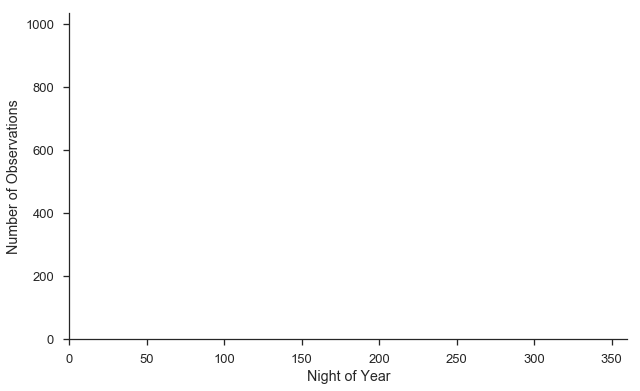

In [32]:
grp_night = df.groupby('night')
nobs_night = grp_night['expDate'].agg(len)
plt.bar(nobs_night.index, nobs_night.values)
plt.xlabel('Night of Year')
plt.ylabel('Number of Observations')
plt.xlim(0,360)
sns.despine()
plt.savefig(f'fig/{sim_name}/nobs_bynight.png')

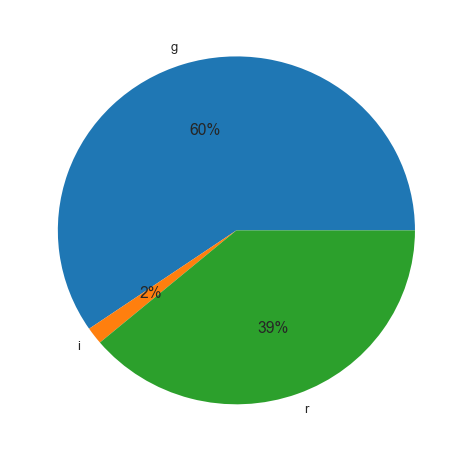

In [33]:
plt.figure(figsize=(8,8))
grp_filter = df.groupby('filter')
nobs_perfilter = grp_filter['expDate'].agg(len)
plt.pie(nobs_perfilter, labels=nobs_perfilter.index, autopct='%.0f%%')
plt.savefig(f'fig/{sim_name}/nobs_byfilter.png')

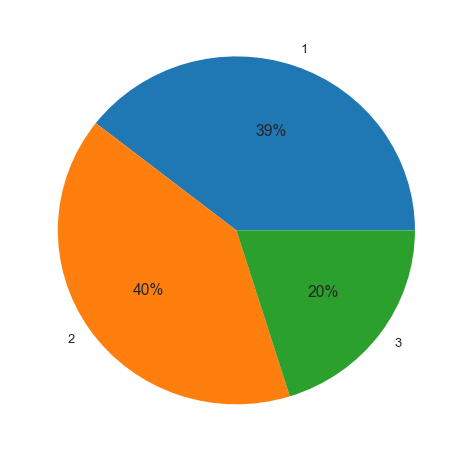

In [34]:
plt.figure(figsize=(8,8))
grp_program = df.groupby('propID')
nobs_perprogram = grp_program['expDate'].agg(len)
plt.pie(nobs_perprogram, labels=nobs_perprogram.index, autopct='%.0f%%')
plt.savefig(f'fig/{sim_name}/nobs_byprogram.png')

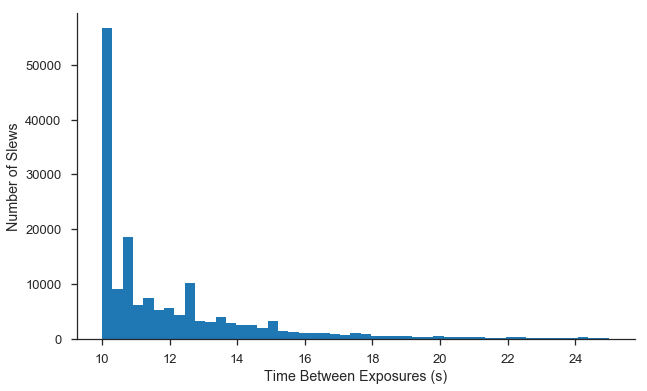

In [35]:
plt.hist(df.loc[df.slewTime.notnull(),'slewTime'],bins=np.linspace(10,25,50))
plt.xlabel('Time Between Exposures (s)')
plt.ylabel('Number of Slews')
sns.despine()
plt.savefig(f'fig/{sim_name}/slew_time_hist.png')

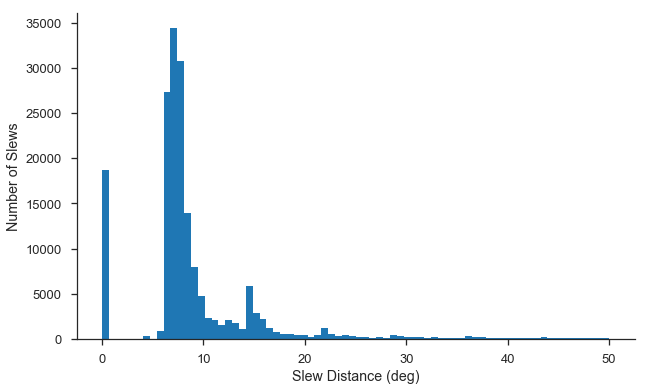

In [36]:
plt.hist(np.degrees(df.loc[df.slewTime.notnull(),'slewDist']),bins=np.linspace(0,50,75))
plt.xlabel('Slew Distance (deg)')
plt.ylabel('Number of Slews')
sns.despine()
plt.savefig(f'fig/{sim_name}/slew_distance_hist.png')

In [37]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///../data/ptf.db')
ptf_df = pd.read_sql('Summary', engine)

In [38]:
from astropy.time import Time
iptf_start = Time('2013-01-01').mjd
wiptf = ptf_df.expMJD >= iptf_start

In [39]:
ptf_df.columns

Index(['obsHistID', 'propID', 'fieldID', 'filter', 'expMJD', 'night',
       'visitExpTime', 'airmass', 'lst', 'altitude', 'azimuth', 'moonRA',
       'moonDec', 'moonAlt', 'moonPhase', 'wind', 'humidity', 'finSeeing',
       'filtSkyBrightness', 'fiveSigmaDepth', 'sessionID', 'fieldRA',
       'fieldDec', 'expDate', 'rotSkyPos', 'ditheredRA', 'ditheredDec'],
      dtype='object')

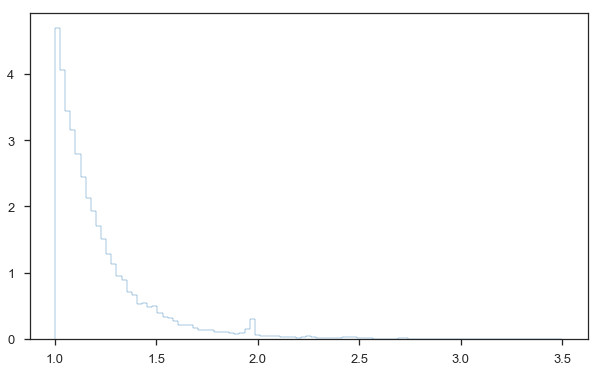

In [40]:
_ = plt.hist(ptf_df[wiptf].airmass,bins=np.linspace(1,3.5,100),histtype='step',normed=True, label='iPTF')

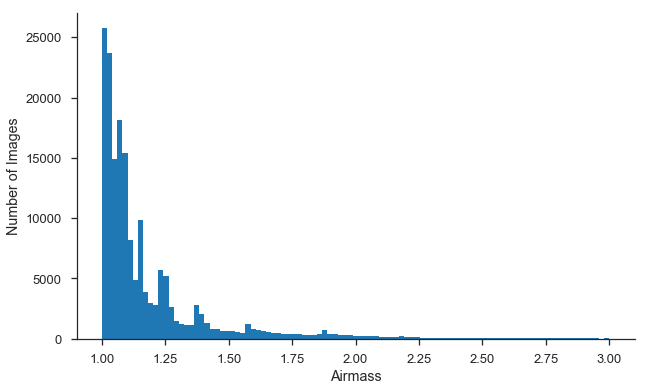

In [41]:
plt.hist(df.airmass,bins=np.linspace(1,3,100))
plt.xlabel('Airmass')
plt.ylabel('Number of Images')
sns.despine()
plt.savefig(f'fig/{sim_name}/airmass_hist.png')

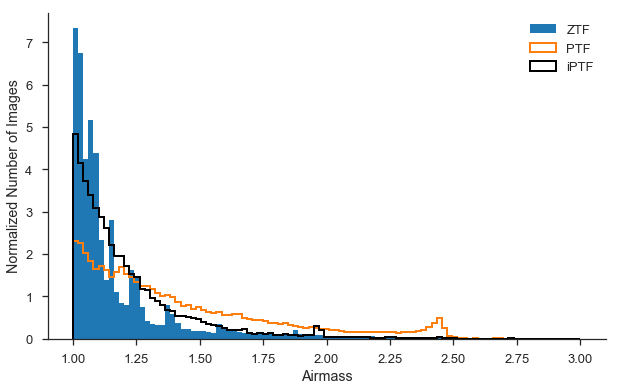

In [42]:
bins = np.linspace(1,3,100)
_ = plt.hist(df.airmass,bins=bins,normed=True,label='ZTF')
_ = plt.hist(ptf_df[~wiptf].airmass,bins=bins,histtype='step',normed=True, label='PTF',linewidth=2)
_ = plt.hist(ptf_df[wiptf].airmass,bins=bins,histtype='step',normed=True, label='iPTF',color='black',linewidth=2)
plt.xlabel('Airmass')
plt.ylabel('Normalized Number of Images')
plt.legend()
sns.despine()
plt.savefig(f'fig/{sim_name}/airmass_hist_vs_ptf.png')

In [43]:
intranight_grp = df.groupby(['night','propID','fieldID'])
intranight_gap = intranight_grp['expMJD'].agg(lambda x: np.median(np.diff(x)))

/Users/ebellm/anaconda3/envs/ztf_sim/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ebellm/anaconda3/envs/ztf_sim/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


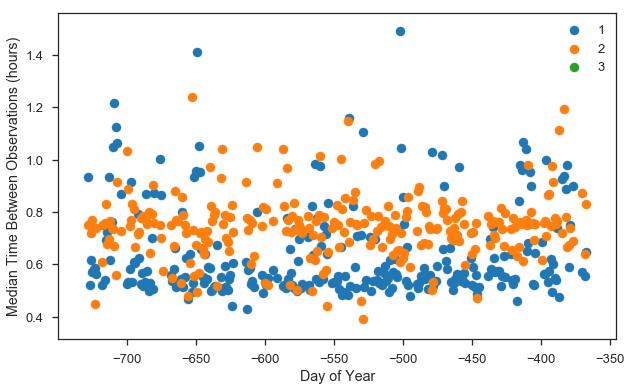

In [44]:
gap = intranight_gap*24.
gap = gap.reset_index()
grp_np = gap.groupby(['night','propID'])
intranight_gap_night_prop = grp_np.agg(np.median)
intranight_gap_night_prop = intranight_gap_night_prop.reset_index()
for prop in [1,2,3]:
    w = intranight_gap_night_prop['propID'] == prop
    plt.scatter(intranight_gap_night_prop.loc[w,'night'], intranight_gap_night_prop.loc[w,'expMJD'], label=prop)
plt.legend()
plt.xlabel('Day of Year')
plt.ylabel('Median Time Between Observations (hours)')
plt.savefig(f'fig/{sim_name}/intranight_gap_by_doy.png')

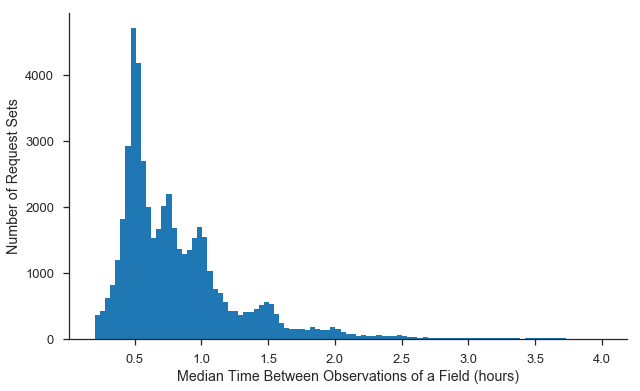

In [45]:
plt.hist(gap.loc[gap['expMJD'].notnull(),'expMJD'],bins=np.linspace(0.2,4,100))
plt.xlabel('Median Time Between Observations of a Field (hours)')
plt.ylabel('Number of Request Sets')
sns.despine()
plt.savefig(f'fig/{sim_name}/intranight_gap_hist.png')

In [46]:
night_min = intranight_grp['expMJD'].agg(np.min)
night_max = intranight_grp['expMJD'].agg(np.max)
night_max = night_max.reset_index('night')
night_min = night_min.reset_index('night')

# not quite right--need to subtract night from night
#intranight_gap = night_max.values[:-1] - night_min.values[1:] 

In [47]:
intranight_gap = {}
for idx in night_min.index:
    intranight_gap[idx] = np.median(night_min.loc[idx,'expMJD'].values[1:] - night_max.loc[idx,'expMJD'].values[:-1])

/Users/ebellm/anaconda3/envs/ztf_sim/lib/python3.6/site-packages/pandas/core/indexing.py:1325: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/Users/ebellm/anaconda3/envs/ztf_sim/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ebellm/anaconda3/envs/ztf_sim/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [48]:
intranight_df = pd.DataFrame.from_dict(intranight_gap,orient='index')

In [49]:
intranight_df = intranight_df.reset_index()

In [50]:
intranight_df['propID'] = intranight_df['index'].apply(lambda x: x[0])
intranight_df['fieldID'] = intranight_df['index'].apply(lambda x: x[1])

In [51]:
intranight_df.head()

,index,0,propID,fieldID
0,"(1, 424)",3.022808,1,424
1,"(1, 461)",1.000182,1,461
2,"(1, 471)",3.011895,1,471
3,"(1, 472)",3.013015,1,472
4,"(1, 504)",3.010349,1,504


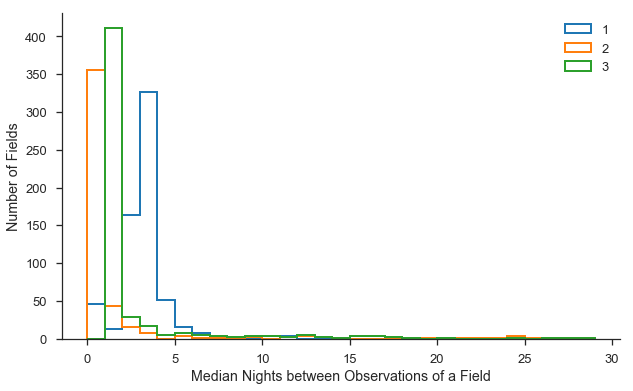

In [52]:
for prop in [1,2,3]:
    w = (intranight_df['propID'] == prop) & intranight_df[0].notnull()
    plt.hist(intranight_df.loc[w,0], bins=np.arange(0,30),label=f'{prop}',histtype='step',linewidth=2)
plt.legend()
plt.xlabel('Median Nights between Observations of a Field')
plt.ylabel('Number of Fields')
sns.despine()
plt.savefig(f'fig/{sim_name}/internight_gap_hist.png')

(array([  5401.,  10027.,  19411.,  26632.,  28117.,  28897.,  25567.,
         18426.,   9382.,   2688.]),
 array([  19.35614653,   35.38860993,   51.42107332,   67.45353671,
          83.48600011,   99.5184635 ,  115.5509269 ,  131.58339029,
         147.61585369,  163.64831708,  179.68078048]),
 <a list of 10 Patch objects>)

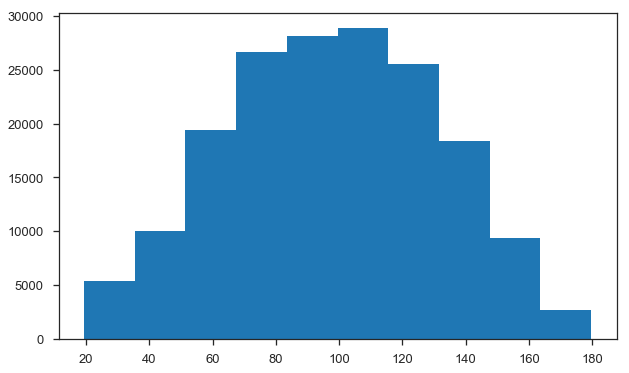

In [7]:
plt.hist(np.degrees(df.dist2Moon))